### 1.2 Linear Regression via Normal Equations

In this exercise you will implement (multiple) linear regression using Normal Equations. See lecture (slides: 2-15) (Click here to download lecture).The learning algorithm is given on the slide 8.
• Reuse dataset from Excercise 1. Load it as Xdata, [Hint:] from loaded data you need to separate ydata i.e. Price, which is your target.


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

Column = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style'\
         ,'drive-wheels','engine-location','wheel-base','lenght','width','height','curb-weight','engine-type'\
         ,'num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio', 'horsepower',\
          'peak-rpm','city-mpg','highway-mpg','price']
# it is provided that the ? represents the missing values 
miss = ['-', 'na', 'Nan', 'nan', 'n\a', '?']
data = pd.read_csv('imports-85.data', names=Column, na_values= miss)

### question
• Choose those columns, which can help you in prediction i.e. contain some use- ful information. You can drop irrelevant columns. Give reason for choosing or dropping any column.

### Ans
I Consider the columns with Nurmeric values. 
To choose which Numeric columns are relevant , I will use the headmap of the correlation matrix

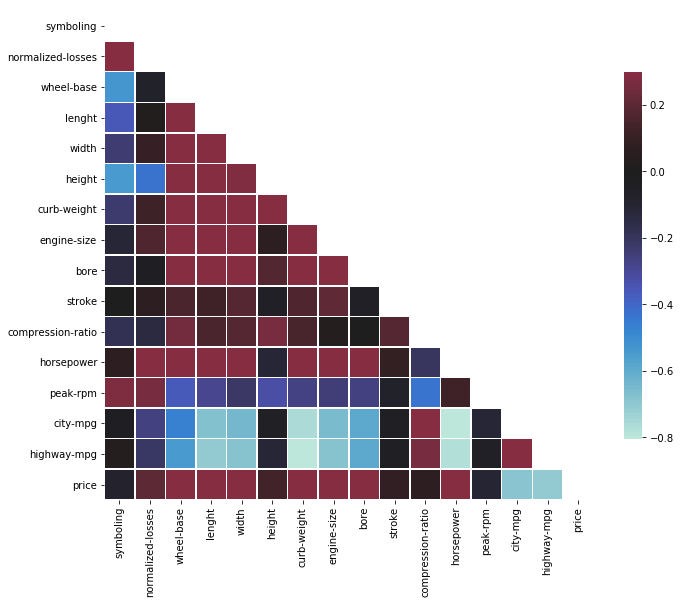

In [2]:
Num_columns = data._get_numeric_data()
corr = Num_columns.corr()  # generate the cooreleation value between columns
mask = np.zeros_like(corr, dtype=np.bool) # creates matrice which contain the boolean value false
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.triu_indices.html 
mask[np.triu_indices_from(mask)] = True  # set the upper triangle part of the triangle to true

plt.subplots(figsize=(11, 9)) # Set up the matplotlib figure

# Draw the heatmap with the mask and correct aspect ratio
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

The heatmap show some corroletion between price and ['wheel-base','lenght','width','curb-weight','engine-size',\
                                                    'bore','horsepower']


In [4]:
price_data = data[['price','wheel-base','lenght','width','curb-weight','engine-size',\
                                                    'bore','horsepower']]
price_data.head()

,price,wheel-base,lenght,width,curb-weight,engine-size,bore,horsepower
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111.0
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111.0
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154.0
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102.0
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115.0


In [6]:

def pivot_research(A,B,j):
    
# =============================================================================
#     
#     N = np.array([[ 5,  6,  7,  8,  9],
#                   [ 0,  1,  2,  3,  4],
#                   [10, 11, 12, 13, 14],
#                   [15, 16, 17, 18, 19]])
#     
#     N[[3,0]]=N[[0,3]]
#     
#     N
#     Out[82]: 
#     array([[15, 16, 17, 18, 19],
#            [ 0,  1,  2,  3,  4],
#            [10, 11, 12, 13, 14],
#            [ 5,  6,  7,  8,  9]])
#     this function will swape the the given row=0 with row=3, 
#     
# =============================================================================
    row, col = A.shape
    p = j
    for i in range(j+1,row):
        if abs(A[i, j]) > abs(A[p,j]):
            p = i
    if p!= j:            # if the initial row is not the biggest
        A[[p,j]] = A[[j,p]] # we swape these two value 
        B[[p,j]] = B[[j,p]] # we swape 

        
def elim_low_triangle(A,B, j):
    "Eliminate the lower triangle value "
    row,_ = A.shape
    for i in range(j+1, row):
        B[i] = B[i]- (A[i,j]/A[j,j])*B[j]
        A[i] = A[i]- (A[i,j]/A[j,j])*A[j]
        
def descente(A, b):
    for j in range(A.shape[1]-1):
        recherche_pivot(A, b, j) 
        elimination_bas(A, b, j)   
def descent(A,B):
    "the return the descendent elimination of \
    the matrix"
    _,col = A.shape
    for k in range(col-1):             # iterate all the row 
        pivot_research(A,B,k)            # put the pivote on top of the selected matrix or submatrix
        elim_low_triangle(A,B,k)         # eliminate the lower part 
        
def elim_up_triangle(A,B,m):
    for i in range(m):
        B[i] = B[i] - (A[i,m]/A[m,m])*B[m]
        
def ascend(A,B):
    _,col = A.shape
    for i in range(col-1,0, -1):
        elim_up_triangle(A,B,i)
        
# after the above operation will have a diagonal matrix 
 
def diagonal(A,B):
    row = B.shape[0]
    for i in range(row):
        B[i] = B[i]/A[i,i]
    return B  # return the final result 

def Gauss(A,B):
    "This return the solution of our system"
    if A.dtype != 'float'or B.dtype != 'float': # this will raise a problem 
        A = A.astype('float')
        B = B.astype('float')
    # create a copy, this allow us to not change permently our inita=ial mtrices 
    R= A.copy()  
    V = B.copy()
    descent(R,V)
    ascend(R,V)
    return diagonal(R,V)     

### Question
• Split your dataset Xdata, Ydata into Xtrain, YtrainandXtest, Ytest i.e. you can ran- domly assign 80% of the data to a Xtrain, Ytrain set and remaining 20% to a Xtest, ytest set.

In [12]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
#df = df.sample(frac=1).reset_index(drop=True) # this allow us to reset the index and drop the old one 
df = price_data.sample(frac=1)
# let fill the missing value with the mean 
for col in price_data.columns:
    price_data[col].fillna(price_data[col].mean(), inplace=True)
# selecting the Xtrain, Ytrain, Xtest, Ytest
def percent(p,total):
    return int((p*total)/100)
 
X_train_df  = price_data['price'][:percent(80,price_data.shape[0])]
X_tes_df     = price_data['price'][percent(80,price_data.shape[0]):]
Y_train_df  = price_data.drop(['price'],axis=1)[:percent(80,price_data.shape[0])]
Y_tes_df    = price_data.drop(['price'],axis=1)[percent(80,price_data.shape[0]):]

/Users/souayboubagayoko/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### question
• Implement learn-linreg-NormEq algorithm and learn a parameter vector β using Xtrain set. You have to learn a model to predict sales price of cars i.e. , ytest.
• Line 6, in learn-linreg-NormEq uses SOLVE-SLE. You have to replace SOLVE-SLE with following options. For each option you will learn a separate set of parameters. (Implement this yourself)
– (a) Gaussian elimination – (c) QR decomposition


In [13]:
def learn_linreg_NormEq_guass(X, Y):
    
    A = X.T.dot(X)
    B = X.T.dot(Y)
    return Gauss(A,B)

def learn_linreg_NormEq_qr(X, Y):
    A = X.T.dot(X)
    B = X.T.dot(Y)
    Q, R = np.linalg.qr(A)
    y = np.dot(Q.T,B)
    return np.linalg.solve(R,y) 
    
X = Y_train_df.values # dependent variable 
Y = X_train_df.values # independent varialbe 
b_gauss = learn_linreg_NormEq_guass(X,Y)
b_qr   = learn_linreg_NormEq_qr(X,Y)

In [14]:
print("Btha Gaus:", b_gauss)
print("Btha QR. :", b_qr)

Btha Gaus: [  139.87985205    29.8104355   -385.77144699     2.73023183
   105.83990356 -1575.4042282     45.63264537]
Btha QR. : [  139.87985205    29.8104355   -385.77144699     2.73023183
   105.83990356 -1575.40422826    45.63264537]


### question 
• Perform prediction y ̄ on test dataset i.e. Xtest using the set of parameters learned in steps 5 and 6 (Hint. you will have two different prediction models based on the replacement function from step 6).


In [20]:
def predict_gaus(X, b):
    return X.dot(b)
def predict_qr(X,b):
     return X.dot(b)
Y_hat_gaus = predict_gaus(X,b_gauss)
Y_hat_qr  =  predict_qr(X,b_qr)

### question 
• Final step is to find how close these two models are to the original values.
– plot residual ε = |ytest − y ̄| vs true value of ytest for each model. – Find the average residual ε = |ytest − y ̄| of each model.
– Find the root-mean-square error (RMSE) = n=1 model.

In [27]:
Y_test = X_tes_df.values
X_tes  = Y_tes_df.values
E_gaus = abs(Y_test- predict_gaus(X_tes,b_gauss))
E_qr   = abs(Y_test- predict_qr(X_tes,b_qr))
print(f"REsidual for Gaus method:{E_gaus}")
print(f"REsidual for QR   method:{E_qr}")
print(f"Average residual for Gaus method:{E_gaus}")
print(f"Average residual for QR   method:{E_qr}")

REsidual for Gaus method:[ 121.2189355   823.12610008  678.68421403 7239.00757215 6038.08664484
 5729.04012225 4868.50979612 4614.06791007  793.34158306 3203.21094224
  200.41629199 2403.47134302 1493.47134302 1263.60154341 5608.20223396
 6277.41150704 7486.14331264 6422.3489136   243.81275873 1906.59856508
  455.62206325 1694.78926057 1566.79386567 1075.33698684  819.5393419
 1622.18788075  170.65554558 1966.09309859 4568.54049444 1071.6149517
 3474.79262605 3332.88090896  492.58795807  254.72276357  363.8938258
  588.10786117  305.38627091  102.87495196  166.9616944  3935.51512974
 5785.06076993]
REsidual for QR   method:[ 121.21893551  823.12610008  678.68421403 7239.00757214 6038.08664483
 5729.04012224 4868.5097961  4614.06791005  793.34158308 3203.21094224
  200.41629198 2403.47134303 1493.47134303 1263.60154342 5608.20223398
 6277.41150706 7486.14331265 6422.34891362  243.81275873 1906.59856509
  455.62206325 1694.78926057 1566.79386568 1075.33698683  819.53934191
 1622.18788075

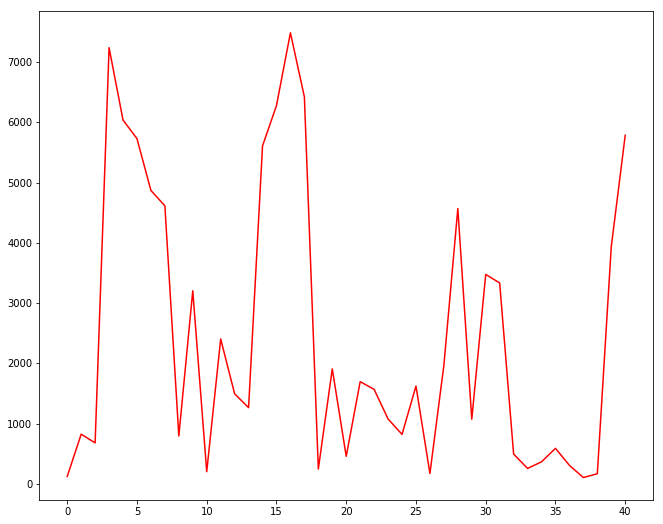

In [26]:
plt.subplots(figsize=(11, 9)) 
plt.plot(E_gaus,'r', label='Residual gaus')
#plt.plot(E_gaus,'g', label='Residual QR')


In [22]:
def RMSE(Y, Y_hat):
    return np.sqrt(sum((Y-Y_hat)**2)/len(Y))

In [28]:
print(f"RMSE residual for Gaus method:{RMSE(Y_test, predict_gaus(X_tes,b_gauss))}")
print(f"RMSE residual for Gaus method:{RMSE(Y_test, predict_qr(X_tes,b_qr))}")

RMSE residual for Gaus method:3382.766699787256
RMSE residual for Gaus method:3382.7666997864403
